In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic')

In [213]:
import matplotlib
matplotlib.font_manager._rebuild()

#### 코랩 사용시

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
import os
os.getcwd()

'/content'

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [ ]:
path = './drive/MyDrive/...'    # 과제 데이터셋이 저장된 경로를 더 작성해주세요
os.chdir(path)

FileNotFoundError: ignored

In [ ]:
os.getcwd()

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [259]:
apart_train = pd.read_csv('/content/drive/MyDrive/DataSciencelab/Supervised Learning/Apartment_train.csv')
apart_test = pd.read_csv('/content/drive/MyDrive/DataSciencelab/Supervised Learning/Apartment_test.csv')

2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [260]:
월세_traindata = apart_train[apart_train['전월세구분'] =='월세']
전세_traindata = apart_train[apart_train['전월세구분'] =='전세']

월세_testdata = apart_test[apart_test['전월세구분'] =='월세']
전세_testdata = apart_test[apart_test['전월세구분'] =='전세']

In [261]:
월세_train = 월세_traindata['월세(만원)']
전세_train = 전세_traindata['보증금(만원)']

월세_test = 월세_testdata['월세(만원)']
전세_test = 전세_testdata['보증금(만원)']

3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

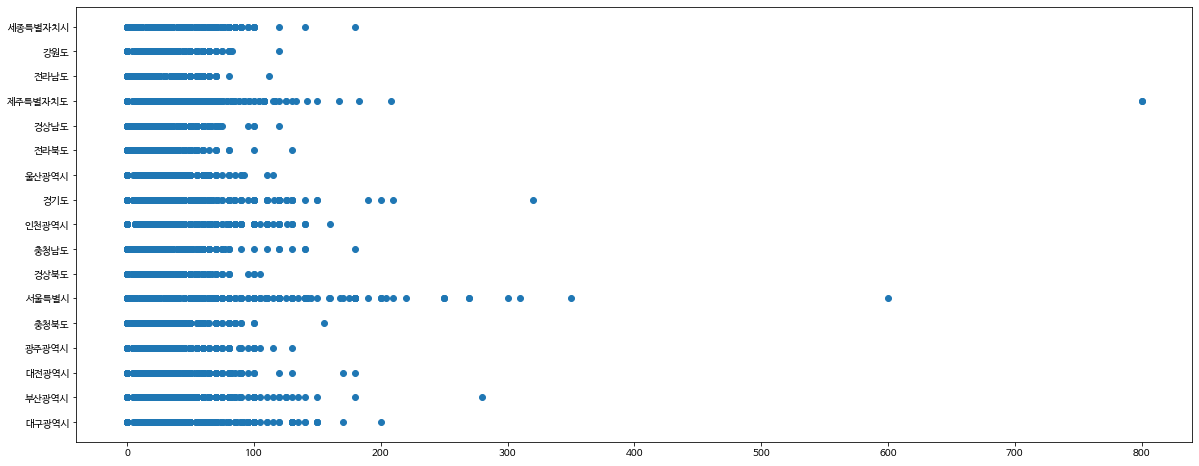

In [262]:
plt.subplots(figsize = (20,8))
plt.scatter(apart_train['월세(만원)'],apart_train['시군구'])

In [263]:
apart_train['건축년도'].unique()

array([2006, 1979, 2018, 1993, 2014, 2003, 2019, 1994, 2017, 2002, 1998,
       2008, 2020, 2016, 1987, 2011, 2001, 1990, 1991, 1995, 1996, 2009,
       2015, 2005, 1989, 2000, 1997, 2013, 1986, 1984, 2012, 1983, 2007,
       2010, 1980, 1999, 1992, 1985, 2021, 1988, 2004, 1976, 1974, 1981,
       1971, 1978, 1982, 1975, 1973, 1977, 1970])

In [264]:
전세_traindata.corr(method = 'pearson')

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.533033,NaN,0.146494,0.190064
보증금(만원),0.533033,1.000000,NaN,0.185872,0.227700
월세(만원),NaN,NaN,NaN,NaN,NaN
층,0.146494,0.185872,NaN,1.000000,0.266430
건축년도,0.190064,0.227700,NaN,0.266430,1.000000


In [265]:
월세_traindata.corr(method='pearson')

,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
전용면적(㎡),1.000000,0.379900,0.473753,0.122702,0.044748
보증금(만원),0.379900,1.000000,0.132703,0.131093,0.156173
월세(만원),0.473753,0.132703,1.000000,0.132955,0.044431
층,0.122702,0.131093,0.132955,1.000000,0.252621
건축년도,0.044748,0.156173,0.044431,0.252621,1.000000


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf366ad750>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


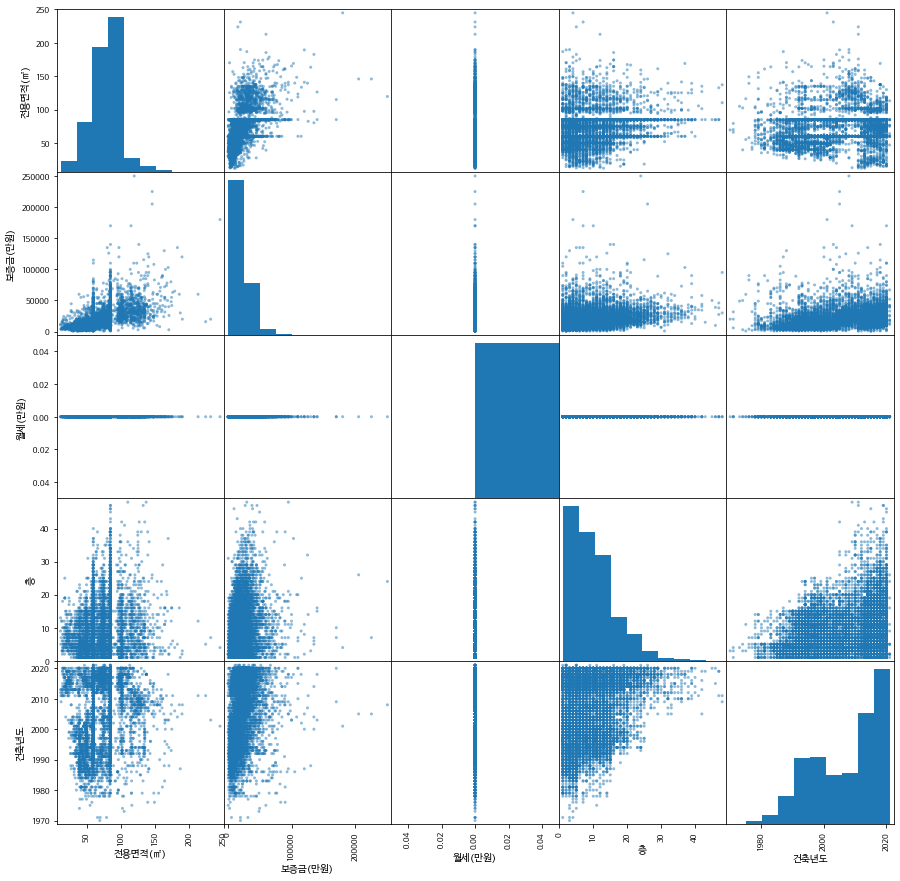

In [266]:
pd.plotting.scatter_matrix(전세_traindata, figsize = (15,15) )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf349cc510>,
      dtype=object)

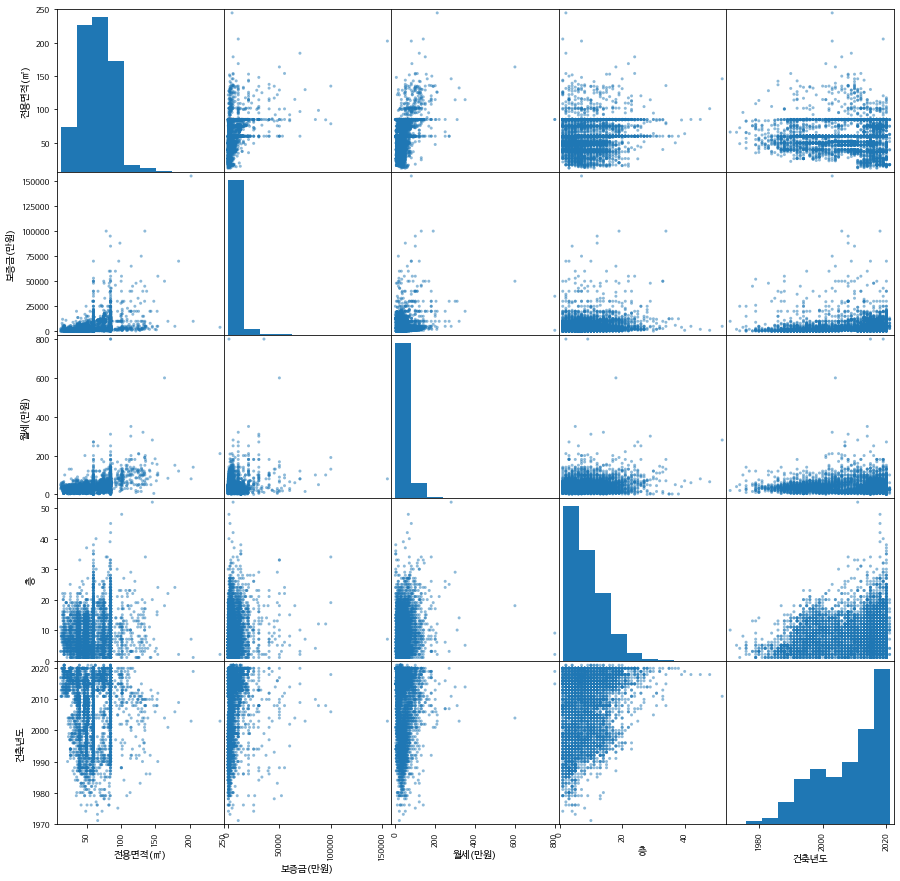

In [267]:
pd.plotting.scatter_matrix(월세_traindata, figsize = (15,15) )

**전용면적이 가장 영향을 많이준다!**


4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [268]:
# 관련 모듈 import
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [269]:
전용면적_월세 = 월세_traindata['전용면적(㎡)']

In [270]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 전용면적_월세
X_train = X_train[:, np.newaxis]
y1_train = 월세_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [271]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [272]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg_1 = LinearRegression()

lin_reg_1.fit(X_train, y1_train)


LinearRegression()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


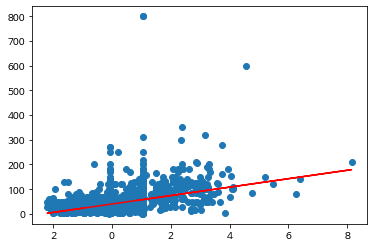

In [273]:
#시각화
plt.scatter(X_train, y1_train)
plt.plot(X_train, lin_reg_1.predict(X_train), c='r')

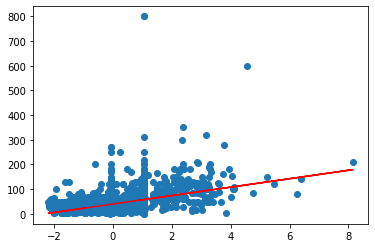

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [274]:
월세_test

0       19
3        7
5       12
8       50
9       19
        ..
2984    12
2985    90
2991    60
2992    25
2999    50
Name: 월세(만원), Length: 1022, dtype: int64

In [275]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_testdata['전용면적(㎡)']
y1_test = 월세_test


In [276]:
# X_test 역시 정규화 해주어야 합니다. 주의할점?
X_test = X_test[:,np.newaxis]
scaler2 = StandardScaler()
X_test = scaler2.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [277]:
# y1_hat에 predict값 할당
y1_hat = lin_reg_1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


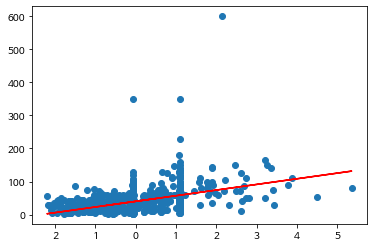

In [278]:
#시각화
plt.scatter(X_test,y1_test)
plt.plot(X_test,y1_hat,label = 'predict', c ='r')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


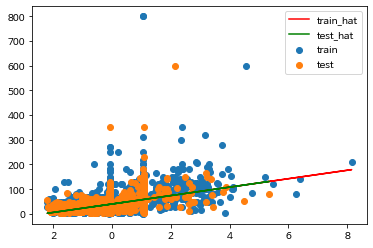

In [279]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r', label='train_hat')
plt.plot(X_test[:, 0], 
         y1_hat, 
         c='g', label='test_hat')

plt.legend();

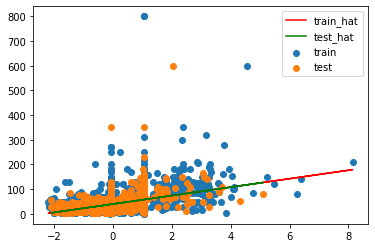

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [280]:
# 관련 모듈 import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [281]:
# 파이프라인 생성
p1 = Pipeline([ 
               ('poly', PolynomialFeatures(degree = 5, include_bias=False)),
               ('scaler',StandardScaler()),
               ('rdg_reg_1',Ridge(alpha=0.3))
])

In [282]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_testdata['전용면적(㎡)']
X_train = X_train[:, np.newaxis]
y2_train = 전세_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [283]:
# 파이프라인 fitting
p1.fit(X_train, y2_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('rdg_reg_1', Ridge(alpha=0.3))])

In [284]:
np.sort(X_train,axis = 0)

array([[ 12.0337],
       [ 14.4726],
       [ 14.83  ],
       ...,
       [167.8677],
       [176.31  ],
       [192.6903]])

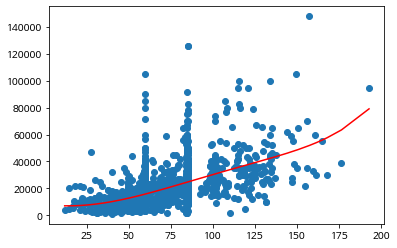

In [285]:
#시각화
plt.scatter(X_train, y2_train)
plt.plot(np.sort(X_train,axis = 0), np.sort(p1.predict(X_train)), c = 'r')

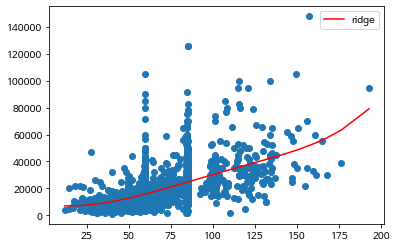

In [286]:
# # 시각화. 체크용입니다.
# # degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p1.predict(X_train)), 
          c='r', label='ridge')
plt.legend();

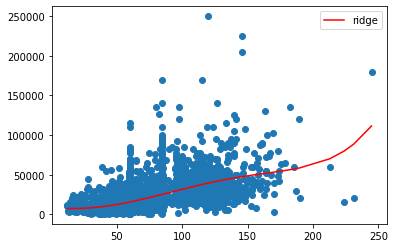

수고하셨습니다.